# Data Challenge 1
- Dataset: 242 rows of data that display a country's population, economy, and features from the World Happiness Report
- Target: Immigration to the United States

### Spoiler: I decided to use Polynomial Regression to produce my model to generate predictions for the target "Immigration to the United States"
- When visualizing my correlation matrix, there are no clear linear trends, and I don't want to underfit my model.
- IE I do not see a clear linear relationship between the features and the target
- I also don't want to overfit my model, so I have to be careful about choosing too high of a degree for my polynomial Regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


train_x_region = pd.read_csv("train_x_region.csv")
train_labels = pd.read_csv("train_y.csv")
test_features = pd.read_csv("test_x_region.csv")

In [2]:
#Combine train_x_region and train_labels

complete_train = pd.concat([train_x_region, train_labels], axis=1)
complete_train

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0


In [3]:
complete_train.info()

#all features are numerical values except for Country and Region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              242 non-null    int64  
 1   Country                           242 non-null    object 
 2   Happiness Rank                    242 non-null    int64  
 3   Happiness Score                   242 non-null    float64
 4   Economy (GDP per Capita)          242 non-null    float64
 5   Family                            242 non-null    float64
 6   Health (Life Expectancy)          242 non-null    float64
 7   Freedom                           242 non-null    float64
 8   Trust (Government Corruption)     242 non-null    float64
 9   Generosity                        242 non-null    float64
 10  Population Estimate               242 non-null    int64  
 11  Region                            242 non-null    object 
 12  Immigrat

In [4]:
train_x_region.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09


In [5]:
#Check if there are null values
#Hint: There aren't any
complete_train.isna().sum()

Year                                0
Country                             0
Happiness Rank                      0
Happiness Score                     0
Economy (GDP per Capita)            0
Family                              0
Health (Life Expectancy)            0
Freedom                             0
Trust (Government Corruption)       0
Generosity                          0
Population Estimate                 0
Region                              0
Immigration to the United States    0
dtype: int64

### My observations from the correlation Matrix
- Is there a threshhold that a country's immigration numbers must meet before it is included in this dataset? For example, if a country only has 20 immigrants to the US, is that number too low to be included?
- There is a downward trend regarding the happiness values. The happiness values should be unique values, so why are there more "unhappy" countries than "happy" countries? I think this may be due to the omission of certain countries due to low immigration rates.


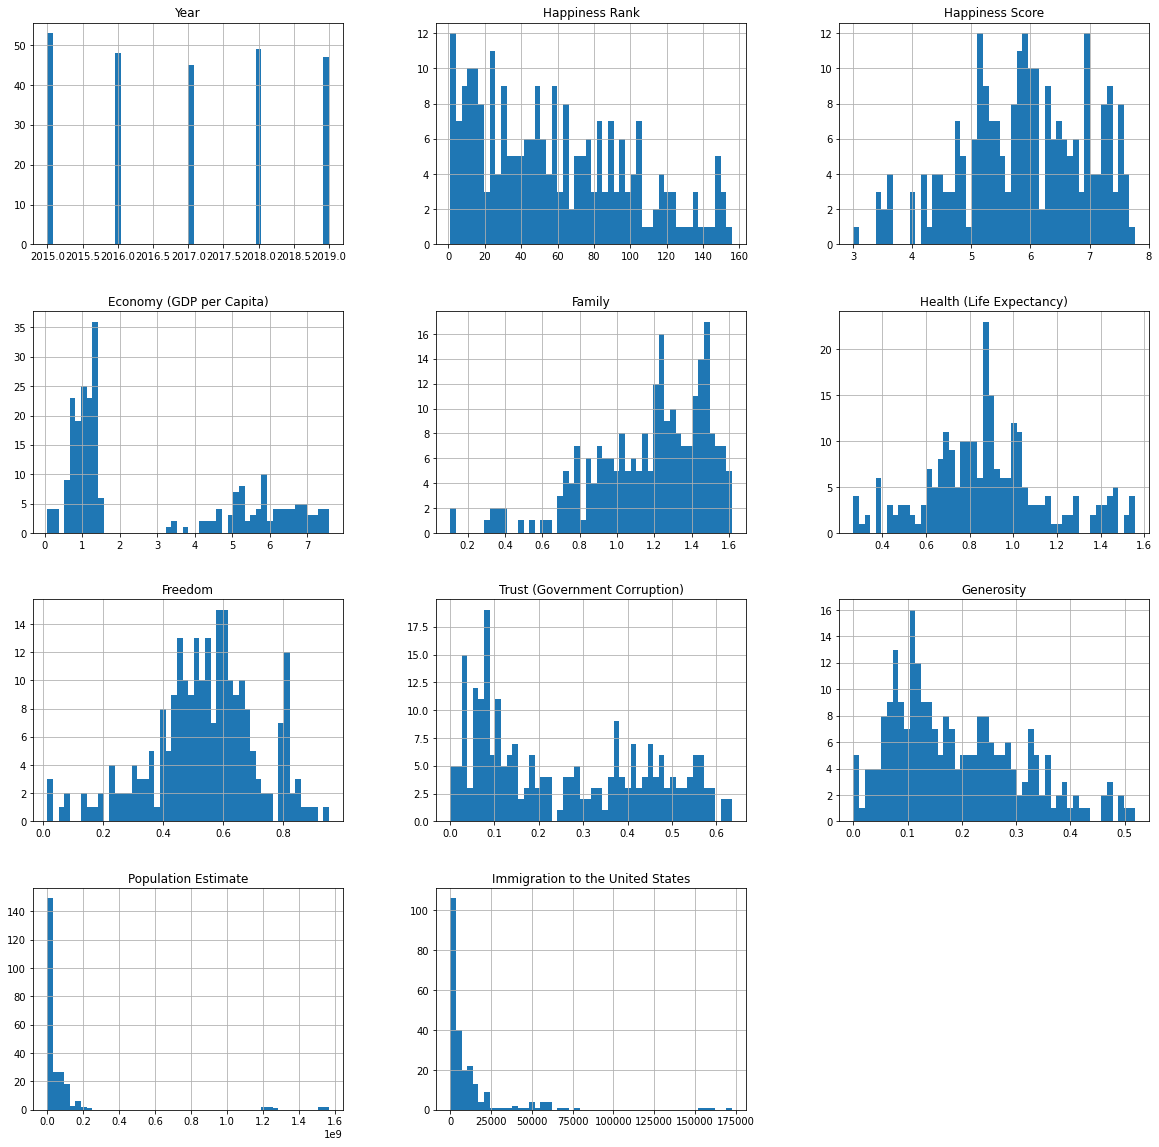

In [6]:
#question about all data, which countries are omitted and why? is it 
#that if immigration is too low, not included

#happiness rank unique values, downward trend, why? less happy countries represented?

#more happy families than less happy families, seems contradictory to happiness rank

#less generous people

complete_train.hist(bins=50, figsize=(20,20))
plt.show()

In [7]:
#see correlation between target and other features
#correlation between immigration and population estimate
#should create standardized values for immigration

corr = complete_train.corr()
corr['Immigration to the United States'].sort_values()

Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Happiness Rank                      0.126923
Population Estimate                 0.445795
Immigration to the United States    1.000000
Name: Immigration to the United States, dtype: float64

In [8]:
#standardize immigration values relative to population estimate
#create it as a new column "std_immigration"

complete_train['std_immigration'] = complete_train['Immigration to the United States']/complete_train['Population Estimate']

## Family and Immigration Correlation

- There isn't a very obvious pattern, but there are some clusters near the bottom right
- There seems to be generally higher immigration numbers for happier families (the peaks are situated in the higher values of Family)
- Why? I would assume that people who are in happy families have a stronger desire to give their families a better life (this is just conjecture, of course)

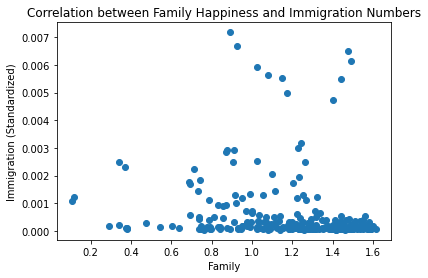

In [9]:
#The Family values have a upward trend, implying that there are more happy families
# I am interested in seeing the correlation between family values and standardized immigration numbers

plt.scatter(complete_train['Family'], complete_train['std_immigration'])
plt.xlabel("Family")
plt.ylabel("Immigration (Standardized)")
plt.title("Correlation between Family Happiness and Immigration Numbers")
plt.show()

In [10]:
#see correlation between standardized target (std_immigration) and other features
corr = complete_train.corr()
corr['std_immigration'].sort_values()

#It is difficult to do any feature engineering between features because the values are based on 
#some arbitrary ranking system, and these rankings aren't necessary directly related to one another

Happiness Score                    -0.162831
Family                             -0.143889
Population Estimate                -0.133059
Health (Life Expectancy)           -0.085975
Freedom                            -0.075189
Generosity                         -0.073544
Trust (Government Corruption)      -0.042822
Economy (GDP per Capita)           -0.013433
Year                                0.010020
Happiness Rank                      0.148433
Immigration to the United States    0.279210
std_immigration                     1.000000
Name: std_immigration, dtype: float64

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Happiness Rank', ylabel='Year'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Year'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Year'>,
        <AxesSubplot:xlabel='Family', ylabel='Year'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Year'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Year'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Year'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Year'>,
        <AxesSubplot:xlabel='Population Estimate', ylabel='Year'>,
        <AxesSubplot:xlabel='Immigration to the United States', ylabel='Year'>,
        <AxesSubplot:xlabel='std_immigration', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>,
        <AxesSubp

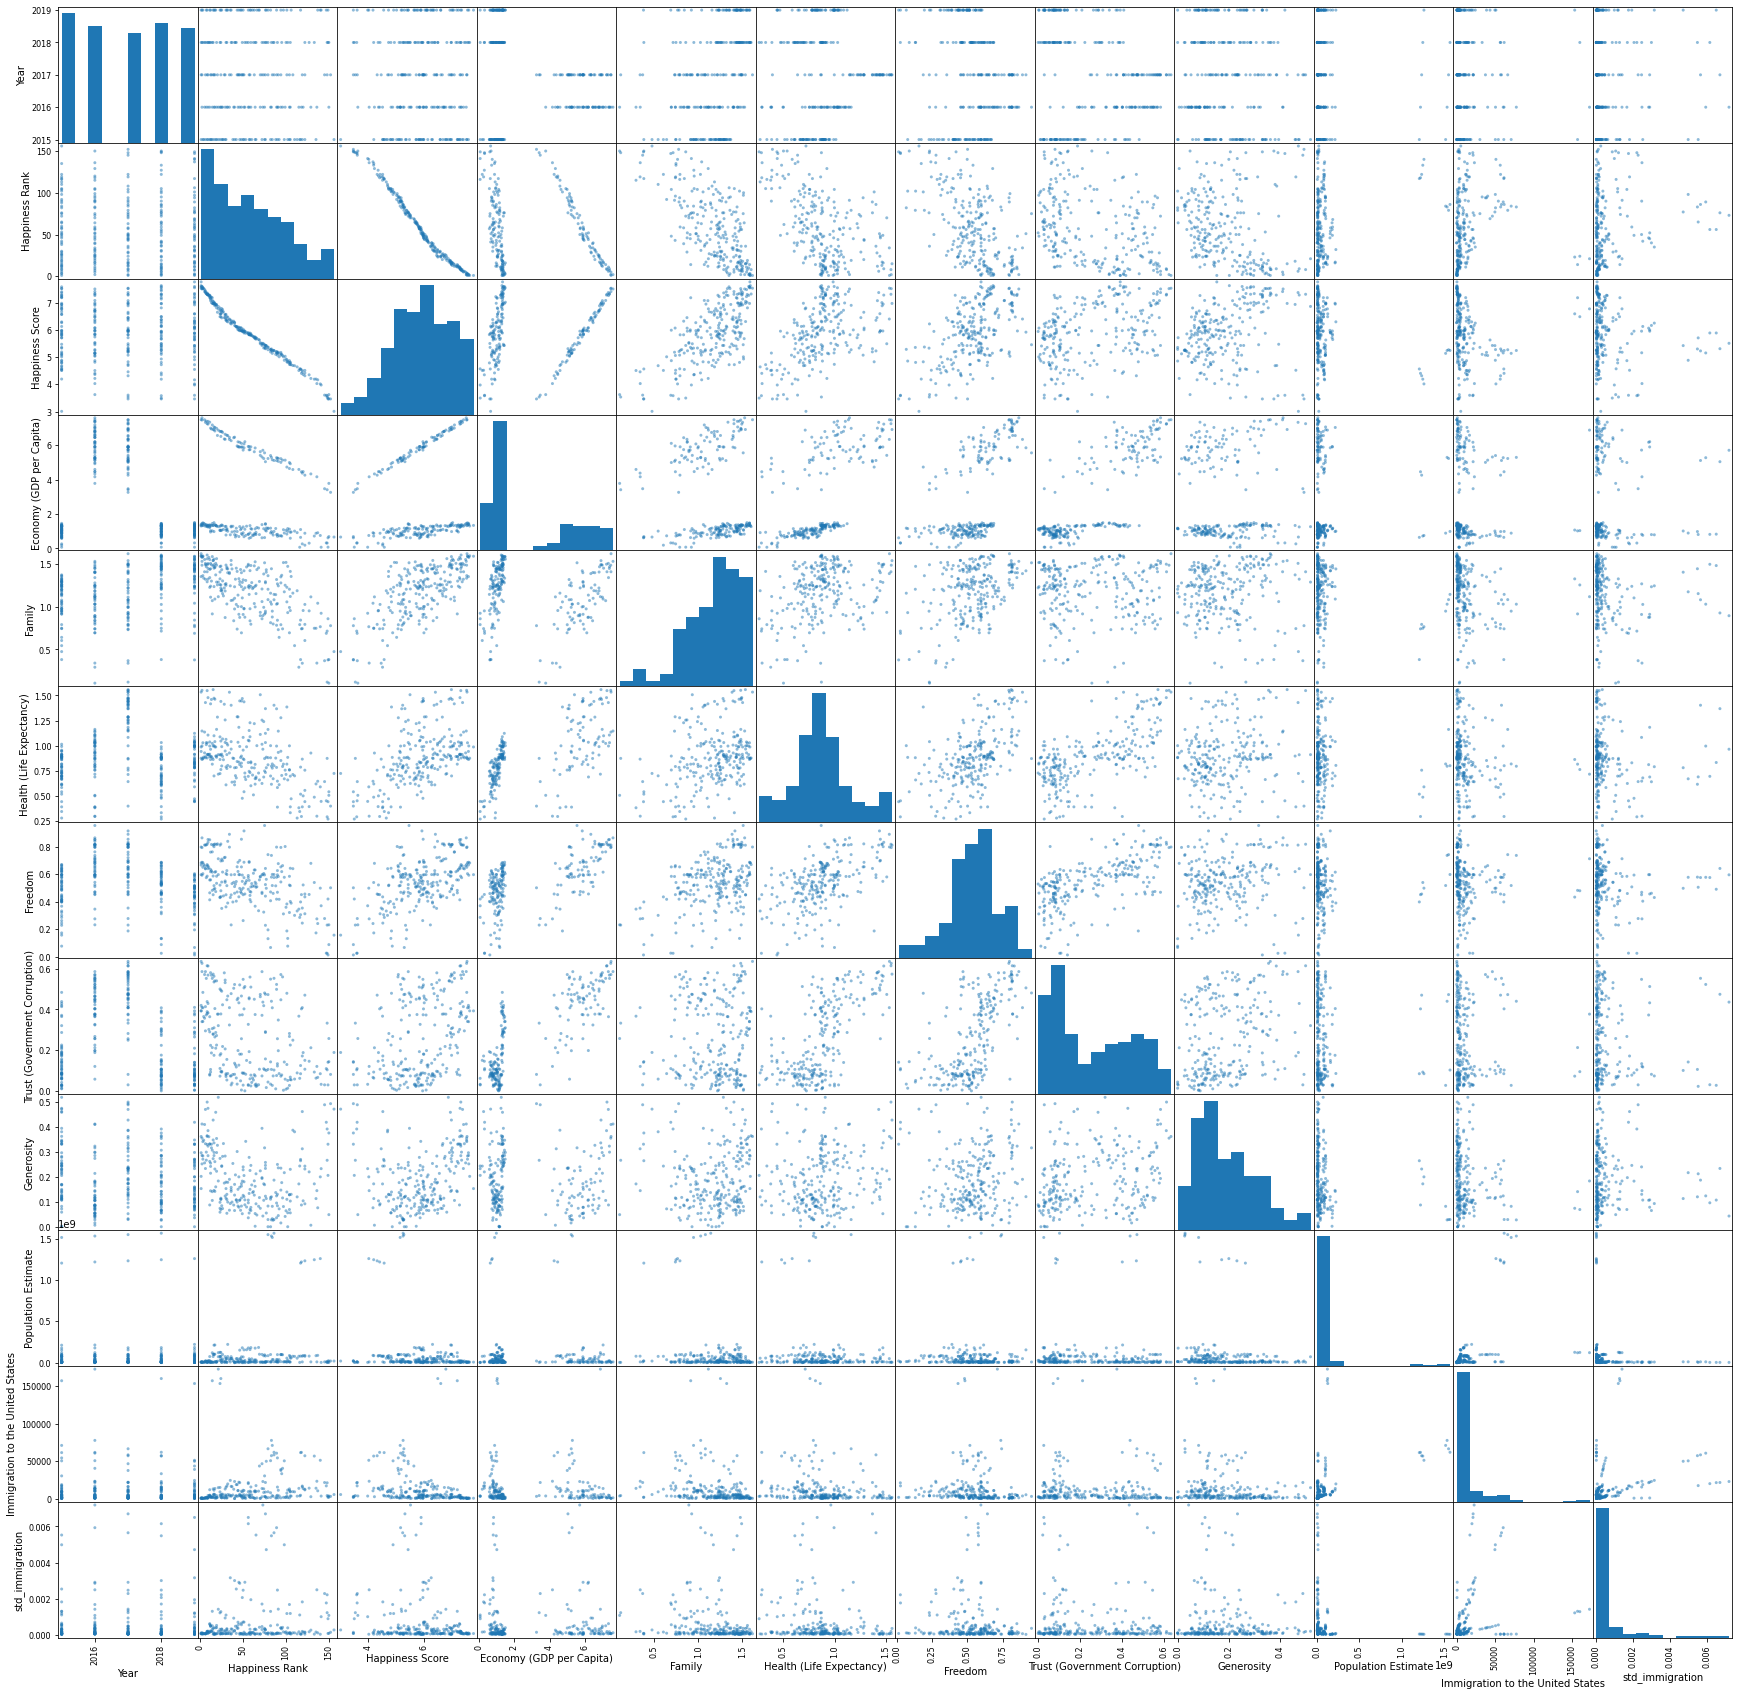

In [11]:
# Plot scatter matrix to see correlations between immigration and other features visually

attributes = ['Year','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Population Estimate','Immigration to the United States', 'std_immigration']
scatter_matrix(complete_train[attributes], figsize=(30,30))

In [12]:
#drop country and region friom train_x_region because they are mostly unique values/strings
#drop immigration because it is our target

complete_train.drop(["Country", "Region","Immigration to the United States", "std_immigration"], axis=1, inplace=True)
complete_train

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
0,2016,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176
1,2018,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393
2,2019,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652
3,2019,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729
4,2016,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622
...,...,...,...,...,...,...,...,...,...,...
237,2017,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788
238,2018,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008
239,2017,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294
240,2019,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331


In [13]:
test_features.drop(["Country", "Region"], axis=1, inplace=True)

## Finding the best Regression Algorithm
- I will train the dataset using Linear Regression, LASSO, Ridge, and Polynomial Regression (In 2, 3, and 4 degrees) to find the most accurate model

In [14]:
#Importing the necessary Regression libaries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

### Using Linear Regression

In [15]:
#Linear Regression

lg = LinearRegression()
lg.fit(complete_train, train_labels)

LinearRegression()

In [16]:
hyp = lg.predict(complete_train)

mean_squared_error(train_labels, hyp)

456105049.29520106

In [17]:
np.sqrt(mean_squared_error(train_labels, hyp))

21356.6160544034

### Using Ridge Regression

In [18]:
#Ridge Regression

ridge = Ridge(alpha=10)
ridge.fit(complete_train, train_labels)

c:\users\sarah\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61861e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=10)

In [19]:
hyp1 = ridge.predict(complete_train)

mean_squared_error(train_labels, hyp1)

465370181.27435076

In [20]:
np.sqrt(mean_squared_error(train_labels, hyp1))

21572.440318015735

### Using LASSO

In [21]:
#LASSO (without normalization)

lasso = Lasso(alpha=10)
lasso.fit(complete_train, train_labels)



Lasso(alpha=10)

In [22]:
hyp2 = lasso.predict(complete_train)

mean_squared_error(train_labels, hyp2)

456176106.6488516

In [23]:
np.sqrt(mean_squared_error(train_labels, hyp2))

21358.279580735234

### Using Polynomial Regression

In [24]:
p2 = PolynomialFeatures(degree=2)
p3 = PolynomialFeatures(degree=3)
p4 = PolynomialFeatures(degree=4)


poly2_x = p2.fit_transform(complete_train)
poly3_x = p3.fit_transform(complete_train)
poly4_x = p4.fit_transform(complete_train)

reg2 = LinearRegression()
reg3 = LinearRegression()
reg4 = LinearRegression()


reg2.fit(poly2_x, train_labels)
reg3.fit(poly3_x, train_labels)
reg4.fit(poly4_x, train_labels)


hyp3_2 = reg2.predict(poly2_x)
hyp3_3 = reg3.predict(poly3_x)
hyp3_4 = reg4.predict(poly4_x)



In [25]:
mean_squared_error(train_labels, hyp3_2)
np.sqrt(mean_squared_error(train_labels, hyp3_2))

19518.128647281694

In [26]:
mean_squared_error(train_labels, hyp3_3)
np.sqrt(mean_squared_error(train_labels, hyp3_3))

20401.335231537338

In [27]:
mean_squared_error(train_labels, hyp3_4)
np.sqrt(mean_squared_error(train_labels, hyp3_4))

19047.161715019934

### Regression Conclusion
- When testing Linear Regression, Polynomial Regression, Ridge Regression, Lasso (normalized and unnormalized), the differences between them were almost neglegible.
- Polynomial Regression (4th degree) produced the smallest mean squared error, but not by much
- I used Polynomial Regression to produce my model to generate predictions for "Immigration"

In [30]:
#Taking the features predicted using Polynomial Regression and storing
#them in a csv file

hyp3_4 = pd.DataFrame(hyp3_4, columns=['Immigration to the United States'])
#Convert values to int to better match train_y, also there are no partial humans
hyp3_4 = hyp3_4.astype(int)
hyp3_4.to_csv('test_predictions.csv', index=None)